## Preprocessing
Compute the shifted cases, neighbor cases and cumulative cases

In [ ]:
import preprocessing
covid_data = '/home/notebooks/Data/Spain/CYL/covid_data/Cyl_hzone_covid_01March_20Nov.csv'
geometry = '/home/notebooks/Data/Spain/CYL/boundary/health_zones.shp'
lag_days = 14
df = preprocessing.preprocessing(covid_data, geometry, lag_days)

In [ ]:
df.to_csv('/home/notebooks/Data/Spain/CYL/Processed_data/CYL_cases_neighbors_shifted_new.csv')

## Computation of the mobility based spatial weights

In [2]:
import wts_computations

#directory containing the daily mobility matrices
mobility_dir = '/home/notebooks/Data/Spain/CYL/mobility_matrices/BSC'

##results from the preprocessing
cyl_covid_path = '/home/notebooks/Data/Spain/CYL/Processed_data/CYL_cases_neighbors_shifted_new.csv'
lag_days = 7

df_wts = wts_computations.wts_computations(mobility_dir, cyl_covid_path, lag_days)

weights computations
........joining.............
Index(['Unnamed: 0', 'date', 'gerencia_code', 'gerencia_name', 'cs_name',
       'health_zone_name', 'daily_new_infected', 'daily_new_death',
       'province_name', 'health_zone_type', 'total_pop', 'female_pop',
       'male_pop', 'female_less_than_25_demanding_employment',
       'female_greater_than_25_demanding_employment',
       'female_total_demanding_employment',
       'male_less_than_25_demanding_employment',
       'male_greater_than_25_demanding_employment',
       'male_total_demanding_employment', 'total_demanding_employment',
       'registered_unemployed_female_less_than_25',
       'registered_unemployed_female_more_than_25',
       'registered_unemployed_female_total',
       'registered_unemployed_male_less_than_25',
       'registered_unemployed_male_more_than_25',
       'registered_unemployed_male_total', 'registered_unemployed_total',
       'number_of_urban_commercial_units', 'number_of_urban_industrial_units',
 

In [4]:
df_wts.to_csv('/home/notebooks/Data/Spain/CYL/Processed_data/cyl_with_BSC_mob_wts_with_7days_lag_new.csv')

## Explore the data 

In [25]:
df_wts['hz_code'] = df_wts['Unnamed: 0']
code_to_name ={}
name_to_code ={}

for hz, n in zip(df_wts['hz_code'], df_wts['health_zone_name']):
    code_to_name[hz] = n
    name_to_code[n] = hz

<AxesSubplot:xlabel='date1', ylabel='weights'>

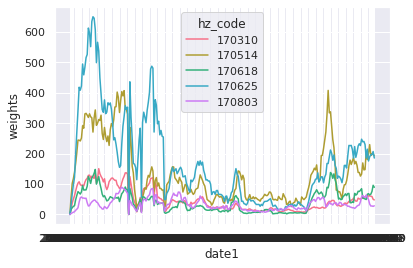

In [41]:
##all healthzones
health_zones = df_wts['hz_code'].unique()
n = 5

import random
import seaborn as sns
from matplotlib import pyplot as plt
##random 10 health zones
health_zones_10 = random.sample(set(health_zones), n)
df_wt_10 = df_wts[df_wts['hz_code'].isin(health_zones_10)]

palette = sns.color_palette("husl", n)
sns.lineplot(data=df_wt_10, x='date1', y='weights', hue='hz_code', palette=palette)

## Apply lstm model

## Apply Convolution Model